# **🌳 Apa Itu Decision Tree?**
Decision Tree adalah algoritma supervised learning yang digunakan untuk klasifikasi maupun regresi. Ia bekerja seperti alur pohon keputusan: dari akar (root) ke daun (leaf), dengan membagi data berdasarkan fitur-fitur tertentu untuk membuat keputusan.

# **🧠 Inti Cara Kerja**
1. Mulai dari seluruh data (root node).
2. Untuk setiap fitur, hitung seberapa baik fitur itu membagi data.
3. Pilih fitur terbaik → buat split.
4. Ulangi langkah 2–3 pada subset data → hasilkan cabang dan daun.
5. Berhenti jika:
    * Data sudah homogen (semua label sama),
    * Tidak ada fitur tersisa,
    * Atau sudah mencapai kedalaman maksimal.

# **📊 Ukuran Pemisahan: Impurity & Information Gain**
Agar pohon tahu fitur mana yang terbaik, digunakan ukuran impurity (ketidakmurnian) dan gain. Dua yang paling sering:

#### 1. Entropy & Information Gain (ID3 Algorithm)
Entropy mengukur ketidakmurnian data:

$$
\text{Entropy}(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)
$$

> 𝑆 = set data

> 𝑐 = jumlah kelas

> 𝑝𝑖 = proporsi kelas ke-i

Information Gain (IG) adalah selisih entropy sebelum dan sesudah split:

$$
\text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot \text{Entropy}(S_v)
$$

#### 2. Gini Impurity (CART Algorithm - digunakan oleh scikit-learn)
$$
\text{Gini}(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

- Nilai Gini minimum = 0 (semua satu kelas)
- Nilai Gini maksimum (kelas seimbang) = mendekati 0.5 atau lebih

Akurasi: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



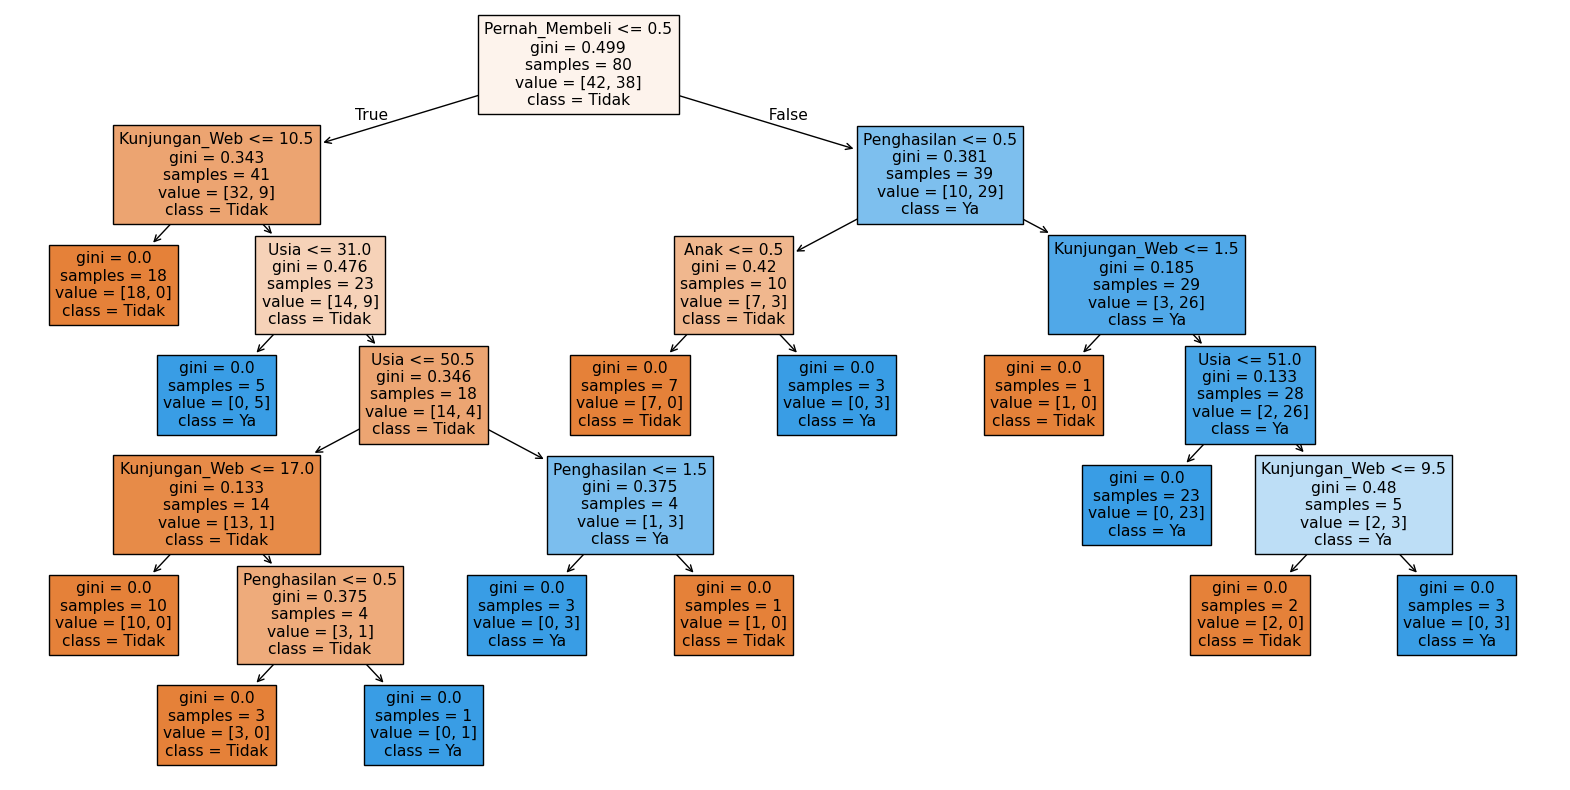

In [1]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 2. Load data
url = '/content/data_decision_tree.csv'  # Upload dulu file ke Colab
df = pd.read_csv(url)

# 3. Preprocessing: Encode kolom kategorikal
le = LabelEncoder()
for col in ['Penghasilan', 'Status_Pernikahan', 'Anak', 'Pernah_Membeli', 'Beli']:
    df[col] = le.fit_transform(df[col])

# 4. Pisahkan fitur dan target
X = df.drop(columns='Beli')
y = df['Beli']

# 5. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 7. Prediksi dan evaluasi
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Tidak', 'Ya'], filled=True)
plt.show()


In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

+----+--------+---------------+---------------------+--------+-----------------+------------------+--------+
|    |   Usia | Penghasilan   | Status_Pernikahan   | Anak   |   Kunjungan_Web | Pernah_Membeli   | Beli   |
+====+========+===============+=====================+========+=================+==================+========+
|  0 |     47 | Tinggi        | Menikah             | Ya     |              11 | Tidak            | Tidak  |
+----+--------+---------------+---------------------+--------+-----------------+------------------+--------+
|  1 |     45 | Tinggi        | Lajang              | Ya     |              10 | Ya               | Ya     |
+----+--------+---------------+---------------------+--------+-----------------+------------------+--------+
|  2 |     43 | Rendah        | Lajang              | Tidak  |              18 | Ya               | Tidak  |
+----+--------+---------------+---------------------+--------+-----------------+------------------+--------+
|  3 |     58 | Sed

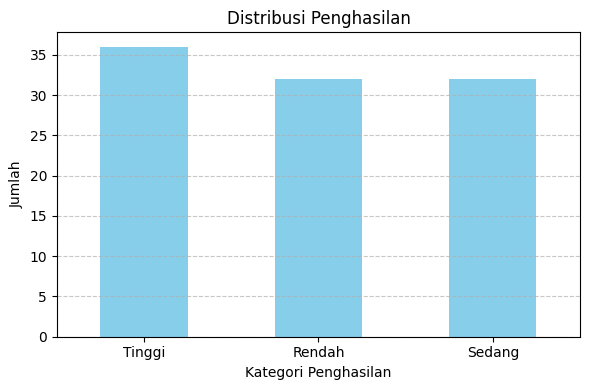

In [19]:
# 1. Baca file CSV
df = pd.read_csv('/content/data_decision_tree.csv')  # Upload dulu file-nya ke Colab

# 2. Hitung jumlah masing-masing kategori di kolom 'Penghasilan'
income_counts = df['Penghasilan'].value_counts()
data_preview = df.head()

# 3. Buat plot batang dari data tersebut
print(tabulate(df, headers='keys', tablefmt='grid', showindex=True))
plt.figure(figsize=(6, 4))
income_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Penghasilan')
plt.xlabel('Kategori Penghasilan')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

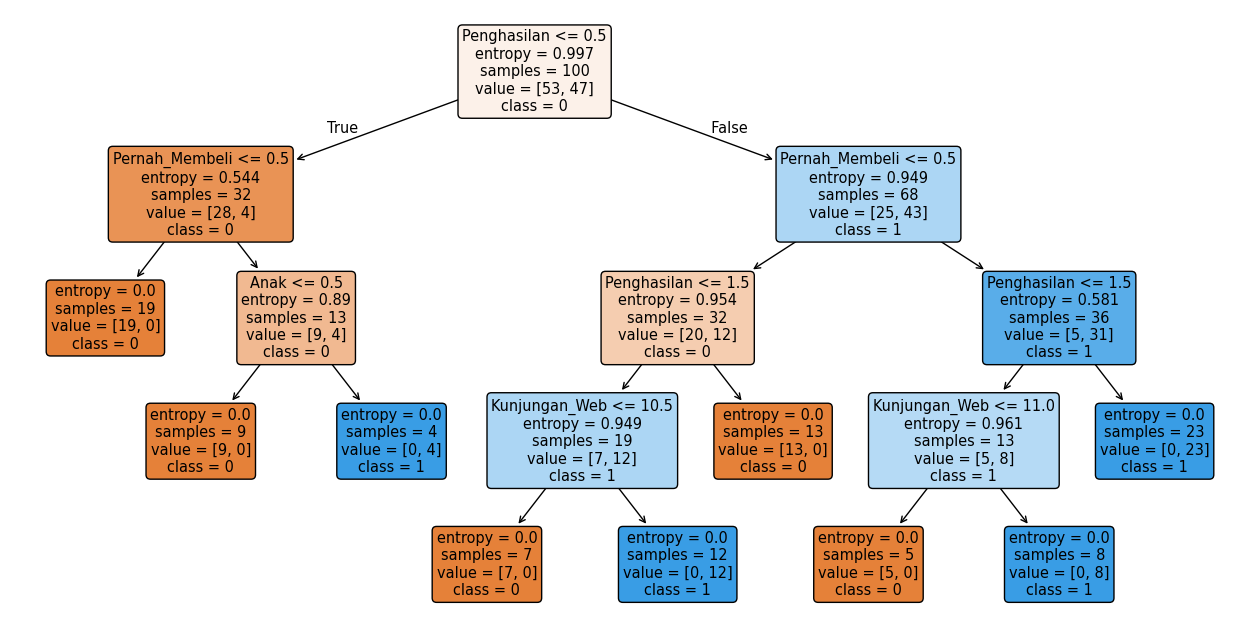

In [32]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in set(y)], filled=True, rounded=True)
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

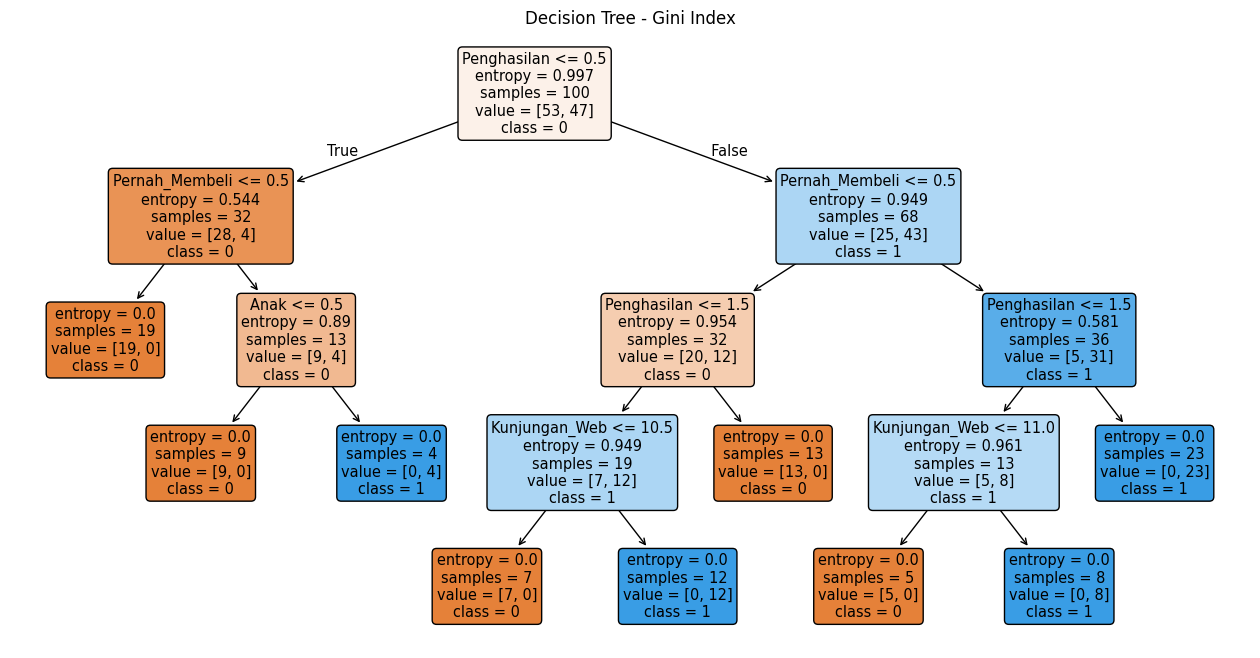

In [29]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in sorted(set(y))],
          filled=True, rounded=True)
plt.title("Decision Tree - Gini Index")
plt.show()

In [36]:
# Prediksi data uji
y_pred = clf.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.95


In [ ]:
import pandas as pd

# Reload the CSV file after code environment reset
file_path = "/mnt/data/data_decision_tree.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()
